# Sklearn experiments

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy
import sklearn
import sklearn.decomposition
import sklearn.manifold
import sklearn.cluster

from underrate import *

In [2]:
dRatings = loadRatings("data/data.txt")
dTrain = loadRatings("data/train.txt", dRatings.shape)
dTest = loadRatings("data/test.txt", dRatings.shape)

dUsers = pd.DataFrame(index=dRatings.index)
dMovies, dGenres = loadMovies("data/movies.txt")

nUsers = dUsers.shape[0]
nRatings = dRatings.shape[0]
nMovies = dMovies.shape[0]
nGenres = dGenres.shape[1]

In [3]:
stats = ratingStats(dRatings)
dMovies = pd.concat([dMovies, stats[1]], axis=1)
dUsers = pd.concat([dUsers, stats[0]], axis=1)

## SVD

In [4]:
# give us plenty of factors to work with
svd = sklearn.decomposition.TruncatedSVD(n_components=50)
svd.fit(np.where(np.isnan(dRatings.values), 0, dRatings.values))

TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
             random_state=None, tol=0.0)

## TSNE on SVD components

In [5]:
tsneFactors = sklearn.manifold.TSNE(n_components=2).fit_transform(svd.components_.T)
print(tsneFactors.shape)

(1682, 2)


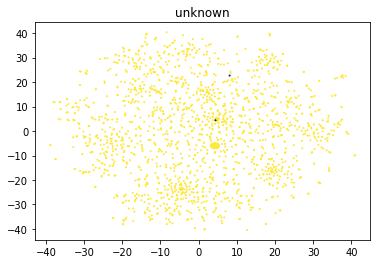

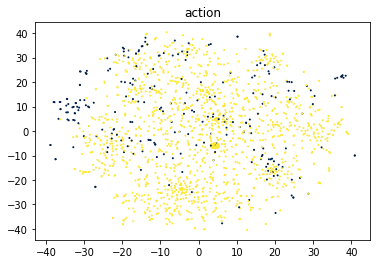

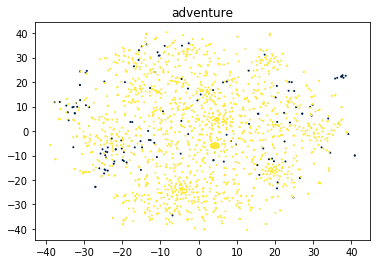

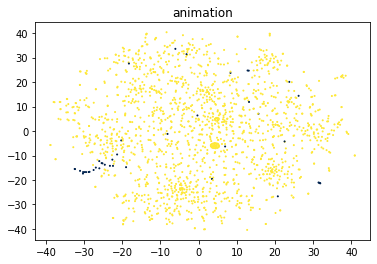

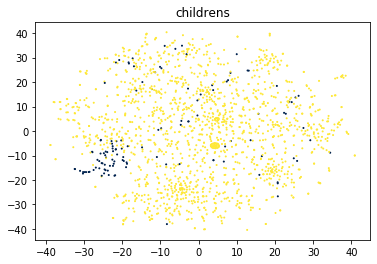

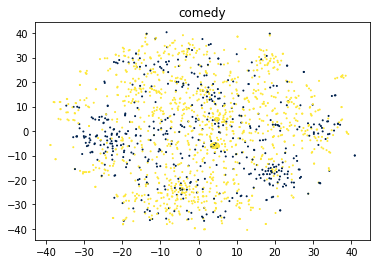

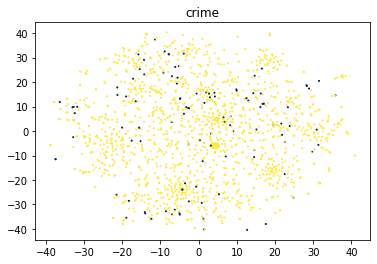

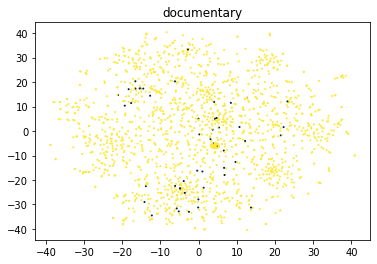

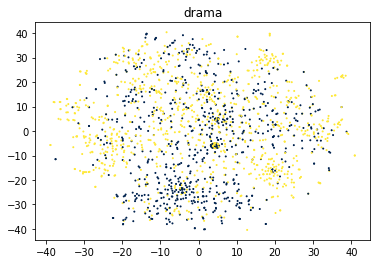

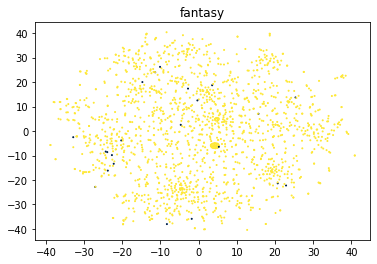

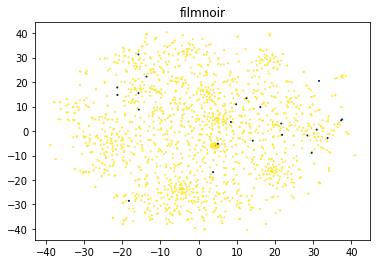

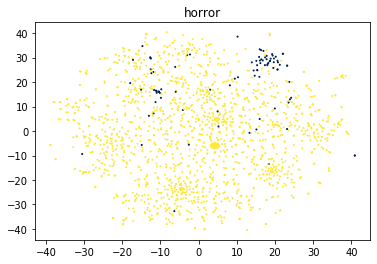

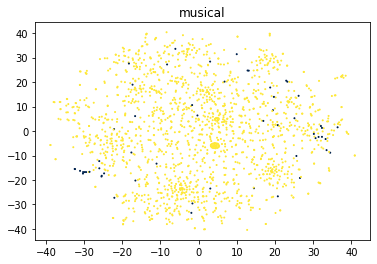

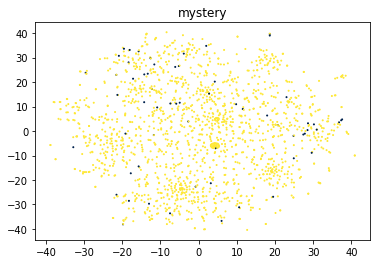

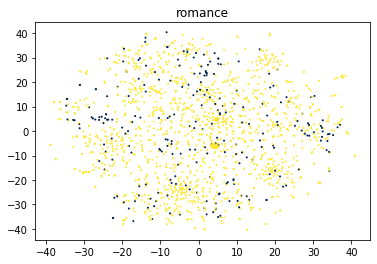

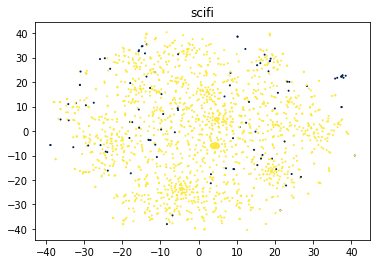

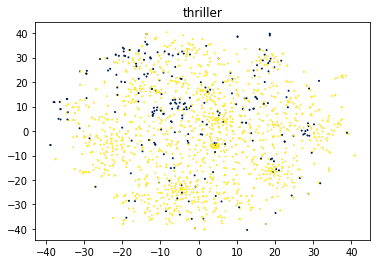

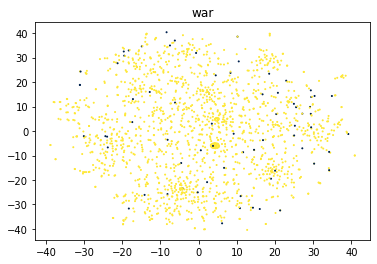

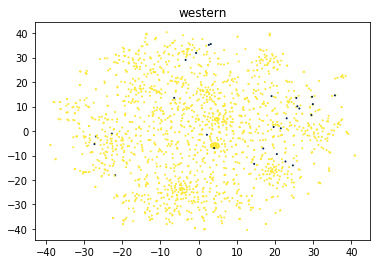

In [6]:
for i in range(19):
    plt.figure()
    plt.title(dGenres.columns[i])
    plt.scatter(tsneFactors[:,0], tsneFactors[:,1], s=1, c=-dGenres.iloc[:,i].values, cmap="cividis")

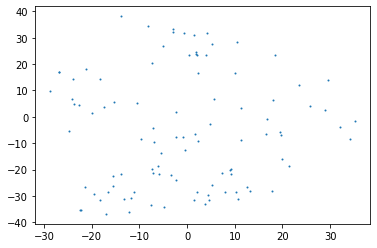

In [7]:
genres = ["drama", "romance"]
movies = dGenres[genres].sum(axis=1) == len(genres)
plt.scatter(tsneFactors[movies,0], tsneFactors[movies,1], s=1)